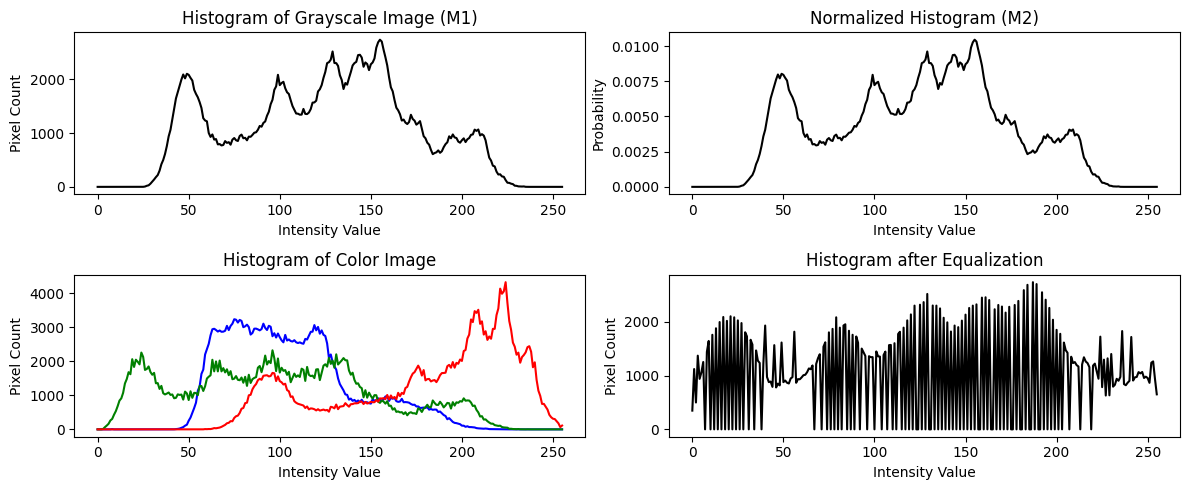

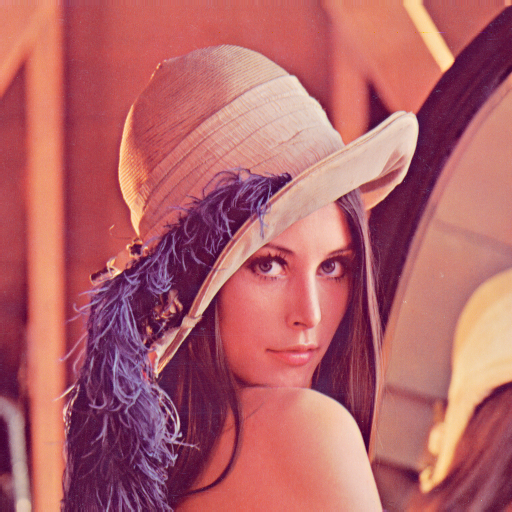

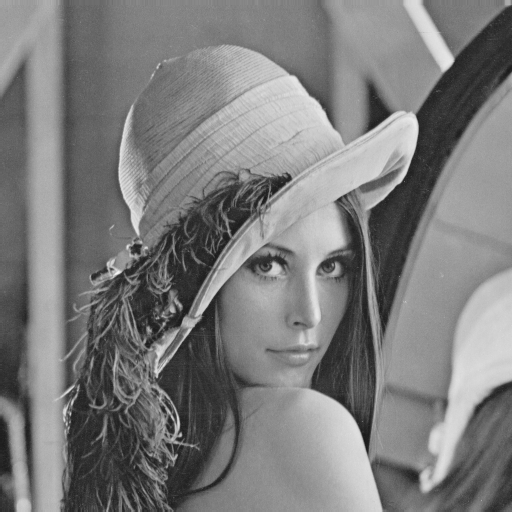

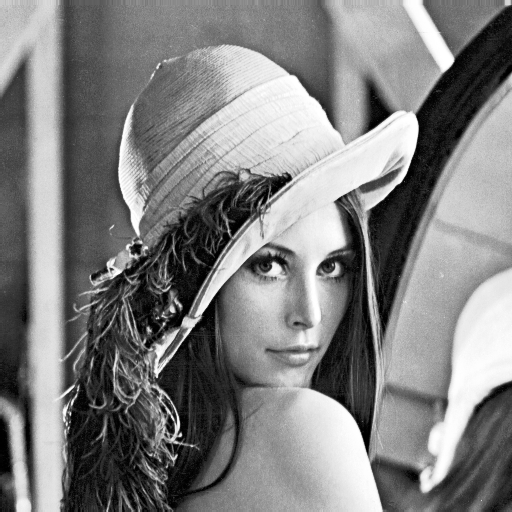

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/sample_data/Lena_Image.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

colors = ('b', 'g', 'r')
hist_color = {}
for i, color in enumerate(colors):
    hist_color[color] = cv2.calcHist([image], [i], None, [256], [0, 256])

plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 1)
plt.plot(hist_gray, color='black')
plt.title('Histogram of Grayscale Image (M1)')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')

plt.subplot(2, 2, 2)
plt.plot(hist_gray / hist_gray.sum(), color='black')
plt.title('Normalized Histogram (M2)')
plt.xlabel('Intensity Value')
plt.ylabel('Probability')

# Color image histogram
plt.subplot(2, 2, 3)
for color, hist in hist_color.items():
    plt.plot(hist, color=color)
plt.title('Histogram of Color Image')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')

# Histogram Equalization
equalized_image = cv2.equalizeHist(gray_image)
hist_eq = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Display histogram-equalized image and histogram
plt.subplot(2, 2, 4)
plt.plot(hist_eq, color='black')
plt.title('Histogram after Equalization')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')

plt.tight_layout()
plt.show()

cv2_imshow(image)
cv2_imshow(gray_image)
cv2_imshow(equalized_image)


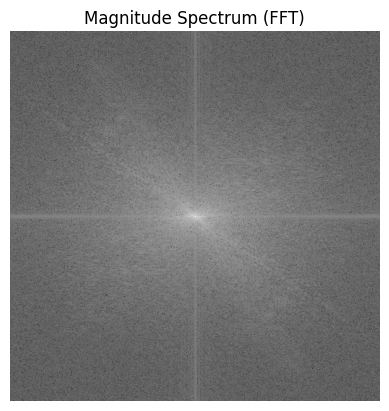

In [18]:

f_transform = np.fft.fft2(gray_image)
f_shift = np.fft.fftshift(f_transform)

magnitude_spectrum = 20 * np.log(np.abs(f_shift))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (FFT)")
plt.axis('off')
plt.show()


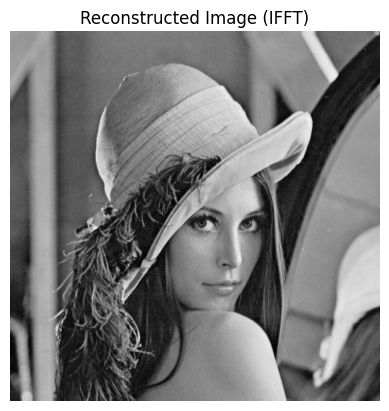

In [19]:

f_ishift = np.fft.ifftshift(f_shift)
reconstructed_image = np.fft.ifft2(f_ishift)
reconstructed_image = np.abs(reconstructed_image)

plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image (IFFT)")
plt.axis('off')
plt.show()


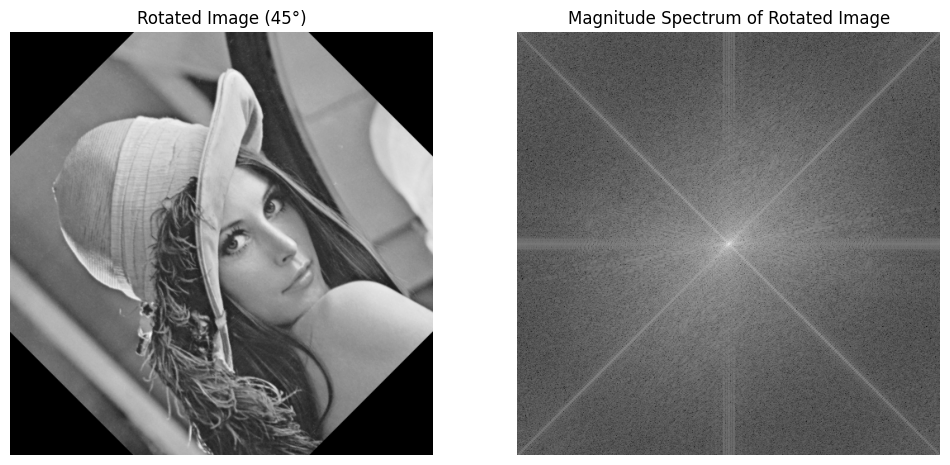

In [20]:
# Rotate the grayscale image by 45 degrees
(h, w) = gray_image.shape
center = (w // 2, h // 2)

# Get Rotation Matrix
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (w, h))

# Compute FFT of Rotated Image
rotated_f_transform = np.fft.fft2(rotated_image)
rotated_f_shift = np.fft.fftshift(rotated_f_transform)
rotated_magnitude_spectrum = 20 * np.log(np.abs(rotated_f_shift) + 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(rotated_image, cmap='gray')
axes[0].set_title("Rotated Image (45°)")
axes[0].axis('off')

axes[1].imshow(rotated_magnitude_spectrum, cmap='gray')
axes[1].set_title("Magnitude Spectrum of Rotated Image")
axes[1].axis('off')

plt.show()
